In [1]:
import math,copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#linear regression using gradient descent with one variable
x_train = np.array([1.0,2.0,3.0,4.0,6.0])
y_train = np.array([300.0,500.0,650.0,800.0,950.0])

In [3]:
#creating cost function for f(w,b) = x*w + b, and y.

def compute_cost(x,y,w,b):
    n = len(x)
    total_cost = 0
    for i in range(n):
        f_wb = w*x[i] + b
        cost = (y[i] - f_wb)**2
        total_cost += cost 
    total_cost = (1/(2*n))*total_cost
    return total_cost

In [4]:
#create a function which computes gradient to minimize w and b.
def compute_gradient(x,y,w,b):
    n = len(x)
    dj_dw = 0
    dj_db = 0
    for i in range(n):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb -y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / n
    dj_db = dj_db / n
    return dj_dw,dj_db

In [5]:
#create gradient descent funcion which find w and b to minimize cost(mean squared error)
def gradient_descent(x,y,w_init,b_init,alpha,compute_cost,compute_gradient):
    j_history = []
    p_history = []
    b = b_init
    w = w_init
    
    for i in range(10000):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        #save cost j at each iteration
        j_history.append(compute_cost(x,y,w,b))
        p_history.append([w,b])
    return w, b, j_history, p_history

In [6]:
w_init = 0
b_init = 0
num_iters = 10000
alpha = 1.0e-2
print(type(num_iters))

<class 'int'>


In [7]:
w_final,b_final,j_history,p_history = gradient_descent(x_train,y_train,w_init,b_init,alpha,compute_cost,compute_gradient)

In [8]:
w_final

129.05405408269394

In [9]:
b_final

227.02702691078127

In [44]:
y_predicted = w_final * x_train + b_final

In [11]:
y_predicted

array([ 356.08108099,  485.13513508,  614.18918916,  743.24324324,
       1001.35135141])

Text(0, 0.5, 'total cost')

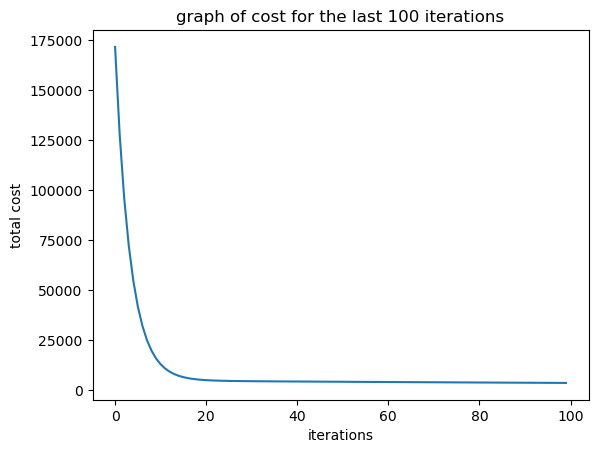

In [12]:
# graph of cost for the last 100 iterations
plt.plot(range(len(j_history[:100])),j_history[:100])
plt.title("graph of cost for the last 100 iterations")
plt.xlabel('iterations')
plt.ylabel('total cost')

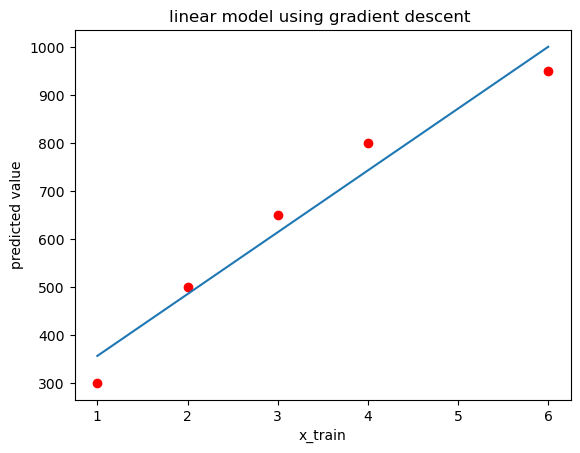

In [20]:
plt.plot(x_train,y_predicted)
plt.title("linear model using gradient descent ")
plt.xlabel("x_train")
plt.ylabel("predicted value")
plt.scatter(x_train,y_train, color= "red")

In [33]:
x_train = x_train.reshape(-1,1)
#linear regression using scikit learn
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

In [41]:
w = reg.coef_
w

array([129.05405405])

In [39]:
b = reg.intercept_
b

227.0270270270271

In [43]:
y_predicted_reg = reg.predict(x_train)

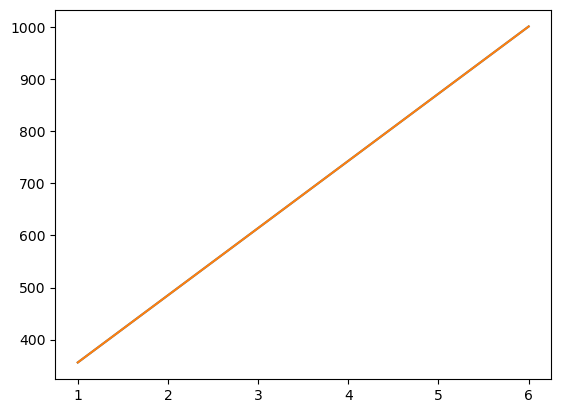

In [45]:
plt.plot(x_train,y_predicted_reg,x_train,y_predicted)